# 6. Random Forest Regression

## 6.1. Préparation de données

In [ ]:
import pandas as pd
import numpy as np
import io
import ast

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
data= pd.read_csv('merged.csv')
data.head()


,epochs,batch_size,dataset_size,non_trainable_params,Conv2D,Dense,Embedding,Flatten,MaxPooling2D,SimpleRNN,co2
0,10,32,2499,150,0,3,0,0,0,0,1.038368e-06
1,15,32,2499,150,0,3,0,0,0,0,9.404010e-07
2,20,32,2499,150,0,3,0,0,0,0,1.097761e-06
3,25,32,2499,150,0,3,0,0,0,0,1.260525e-06
4,30,32,2499,150,0,3,0,0,0,0,1.308075e-06


On affiche les valeurs manquantes par colonne:

In [ ]:
# Affichage des valeurs manquantes par colonne
print(data.isnull().sum())

epochs                  0
batch_size              0
dataset_size            0
non_trainable_params    0
Conv2D                  0
Dense                   0
Embedding               0
Flatten                 0
MaxPooling2D            0
SimpleRNN               0
co2                     0
dtype: int64


## 6.2. Entraînement du modèle

In [ ]:
# Importation des bibliothèques
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Séparation des données en features et target
X = data.drop(['co2'], axis=1)
y = data['co2']


# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle et ajustement sur les données d'entraînement
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_tree = model.predict(X_test)

# Calcul de l'erreur de prédiction
mse = mean_squared_error(y_test, y_pred_tree)

mae = mean_absolute_error(y_test, y_pred_tree)
print('MSE:', mse)
print('MAE:', mae)

MSE: 5.90610754603865e-10
MAE: 1.278180046009761e-05


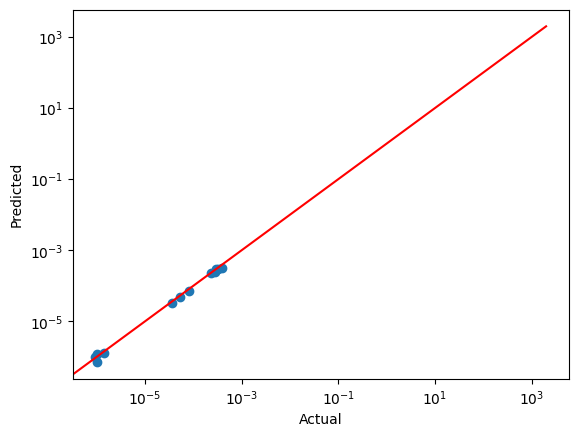

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_tree)
plt.xlabel('Actual')
plt.ylabel('Predicted')
# Logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Plot line x=y
m = int(max(y_test.max(), y_pred_tree.max()))
x = np.linspace(0, 2000, 2000)
plt.plot(x, x, color='red')

plt.show()

## 6.3. Amélioration de l'interprétabilité du modèle

On constate que le modèle de type Ensemble comme la forêt aléatoire a très bonne performance sur ce jeu de données. Toutefois, on ne comprend pas vraiment comment le modèle a pris ses décisions, quels sont les facteurs discriminant. On décide donc de revenir en arrière pour examiner les variables qui ont le plus d'impact sur l'apprentissage grâce à la librairie feature_importances

Dense                   0.245713
epochs                  0.205141
Embedding               0.168042
dataset_size            0.152628
SimpleRNN               0.138748
non_trainable_params    0.041360
Conv2D                  0.023610
Flatten                 0.015514
MaxPooling2D            0.009243
batch_size              0.000000
dtype: float64


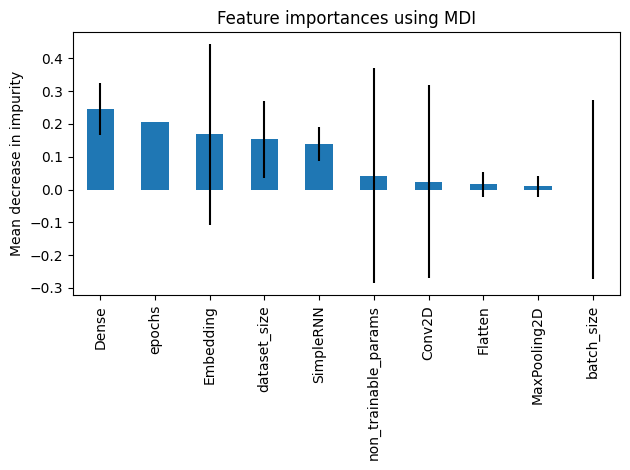

In [ ]:
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

feature_names = list(X_train.columns)
forest_importances = pd.Series(importances, index=feature_names)
sorted_importances = forest_importances.sort_values(ascending = False)
print(sorted_importances)

fig, ax = plt.subplots()
sorted_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 6.4. Regression Ridge

In [ ]:
# evaluate an ridge regression model on the dataset
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# define model
model = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1], gcv_mode = 'auto')

# fit model
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_lin = model.predict(X_test)

# Calcul de l'erreur de prédiction
mae = mean_absolute_error(y_test, y_pred_lin)
print('MAE:', mae)

MAE: 6.17799649591334e-05


In [ ]:
print(model.alpha_)
print(model.score(X,y))

1.0
0.8056472345906338


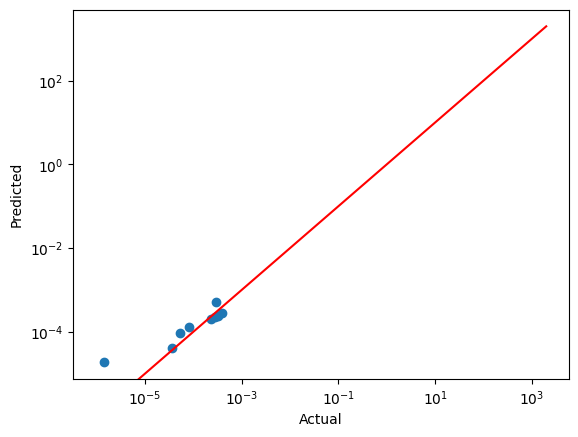

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_lin)
plt.xlabel('Actual')
plt.ylabel('Predicted')
# Logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Plot line x=y
m = int(max(y_test.max(), y_pred_lin.max()))
x = np.linspace(0, 2000, 2000)
plt.plot(x, x, color='red')

plt.show()